# Import and Install Dependencies

In [1]:
!pip install  matplotlib

# Clone data

In [2]:
!git clone https://github.com/NgKhTr/CS114_N21_2Q2T.git
%cd /content/CS114_N21_2Q2T

Cloning into 'CS114_N21_2Q2T'...
remote: Enumerating objects: 62259, done.
remote: Counting objects: 100% (27931/27931), done.
remote: Compressing objects: 100% (27927/27927), done.
remote: Total 62259 (delta 4), reused 27918 (delta 4), pack-reused 34328
Receiving objects: 100% (62259/62259), 77.82 MiB | 15.31 MiB/s, done.
Resolving deltas: 100% (7672/7672), done.
Updating files: 100% (51017/51017), done.
/content/CS114_N21_2Q2T


# Preprocess Data and Create Labels and Features

In [3]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import TensorBoard
from createModel import create_model
import os
import numpy as np
from init import parameter
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score,f1_score


In [4]:
actions=parameter["actions"]
label_map = {label:num for num, label in enumerate(actions)}
no_sequences=parameter["no_sequences"]
FPS=parameter["FPS"]
DATA_PATH=parameter["DATA_PATH"]
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(FPS):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [11]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X.shape

(1700, 30, 258)

# Train LSTM Neural Network

In [13]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [18]:
model=create_model(actions)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            82688     
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 17)                561       
                                                                 
Total params: 237,713
Trainable params: 237,713
Non-tr

In [19]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/30
43/43 [==============================] - 13s 168ms/step - loss: 2.5869 - categorical_accuracy: 0.1162
Epoch 2/30
43/43 [==============================] - 9s 199ms/step - loss: 2.1169 - categorical_accuracy: 0.2632
Epoch 3/30
43/43 [==============================] - 9s 209ms/step - loss: 1.7495 - categorical_accuracy: 0.3956
Epoch 4/30
43/43 [==============================] - 7s 168ms/step - loss: 1.7503 - categorical_accuracy: 0.3838
Epoch 5/30
43/43 [==============================] - 9s 206ms/step - loss: 1.7212 - categorical_accuracy: 0.3779
Epoch 6/30
43/43 [==============================] - 9s 205ms/step - loss: 1.7175 - categorical_accuracy: 0.4419
Epoch 7/30
43/43 [==============================] - 7s 163ms/step - loss: 1.6868 - categorical_accuracy: 0.4037
Epoch 8/30
43/43 [==============================] - 9s 199ms/step - loss: 1.3872 - categorical_accuracy: 0.5059
Epoch 9/30
43/43 [==============================] - 7s 170ms/step - loss: 1.0294 - categorical_accuracy

# Result

In [21]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

11/11 [==============================] - 95s 16ms/step


In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

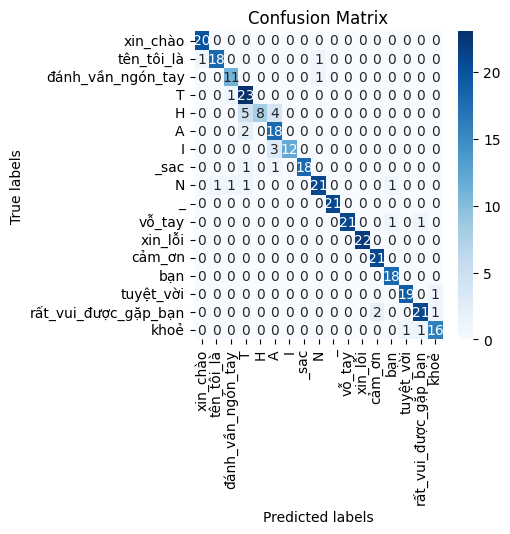

In [25]:
cm = confusion_matrix(ytrue, yhat)
plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=actions, yticklabels=actions)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.show()

In [23]:
print("ACC:",accuracy_score(ytrue, yhat))
print("f1:", f1_score(ytrue, yhat, average='macro'))

ACC: 0.9058823529411765
f1: 0.9013497939121045


In [26]:
model.save('action.h5')